<a href="https://colab.research.google.com/github/wbjimmer/Machine-Learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
pd.set_option('precision', 2)

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [14]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [15]:
import seaborn as sns

In [16]:
sns.set_style('whitegrid')

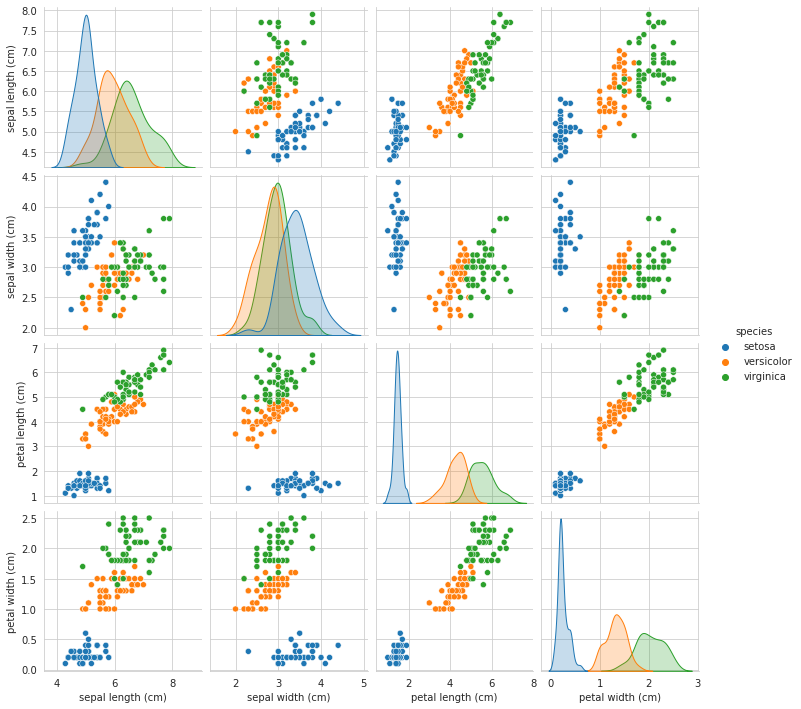

In [17]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

In [ ]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=11)

In [ ]:
kmeans.fit(iris.data)

In [ ]:
print(kmeans.labels_[0:50])

In [ ]:
print(kmeans.labels_[50:100])

In [ ]:
print(kmeans.labels_[100:150])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2, random_state=11)

In [ ]:
pca.fit(iris.data)

In [ ]:
iris_pca = pca.transform(iris.data)

In [ ]:
iris_pca.shape

In [ ]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component1', 'Component2'])

In [ ]:
iris_pca_df['species'] = iris_df.species

In [ ]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

In [ ]:
iris_centers = pca.transform(kmeans.cluster_centers_)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

In [ ]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

In [ ]:
from sklearn.cluster import DBSCAN, MeanShift,\
    SpectralClustering, AgglomerativeClustering

In [ ]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [ ]:
import numpy as np

In [ ]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')     

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [ ]:
clustering = KMeans(n_clusters =3,random_state=1)

In [ ]:
x = scale(iris.data)

In [ ]:
clustering = KMeans(n_clusters =3,random_state=1)

In [ ]:
clustering.fit(x)

In [ ]:
clustering.labels_

In [ ]:
iris_df = pd.DataFrame(iris.data)

In [ ]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [ ]:
y=pd.DataFrame(iris.target)
y.columns=['targets']

In [ ]:
y.head()

In [ ]:
distortions = []
K = range(1,18)
print(K)

In [ ]:
from scipy.spatial.distance import cdist
import math
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]

In [ ]:
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

In [ ]:
distortions

In [ ]:
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
print(mnist.DESCR)

In [ ]:
mnist.target[::100]

In [ ]:
mnist.data.shape

In [ ]:
mnist.target.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, random_state=11)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
from sklearn.preprocessing import StandardScaler    

In [ ]:
st_x= StandardScaler()    

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2, random_state=11)

In [ ]:
pca.fit(mnist.data)

In [ ]:
mnist_pca = pca.transform(mnist.data)

In [ ]:
mnist_pca.shape

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
classifier= LogisticRegression(random_state=0)  

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
classifier.fit(X_train, y_train)  